In [0]:
#Followed examples from:
#https://medium.freecodecamp.org/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels

print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

11493376/11490434 [==============================] - 0s 0us/step
Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [0]:
imageWidth = 28
imageHeight = 28
image_vector_size = imageWidth * imageHeight
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def TestModel(batchSize, epochs, layers, activation):
  model = Sequential()
  for layerCount in layers:
    print(type(layerCount))
    model.add(Dense(units=int(layerCount), activation=activation, input_shape=(image_vector_size,))) 
#   model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  model.summary()

  model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, batch_size=batchSize, epochs=epochs, verbose=False, validation_split=.1)
  loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training', 'validation'], loc='best')
  plt.show()

  print(f'Test loss: {loss:.3}')
  print(f'Test accuracy: {accuracy:.3}')

<class 'int'>
<class 'int'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_29 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


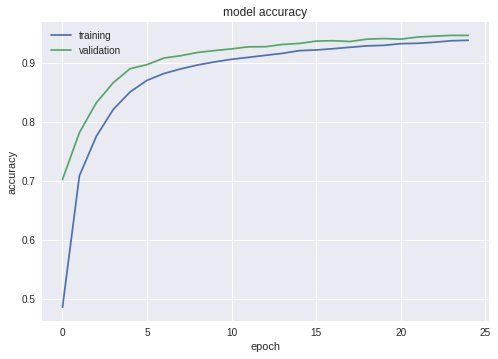

Test loss: 0.251
Test accuracy: 0.934


In [18]:
TestModel(128, 25, [128, 32],'sigmoid')

<class 'int'>
<class 'int'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


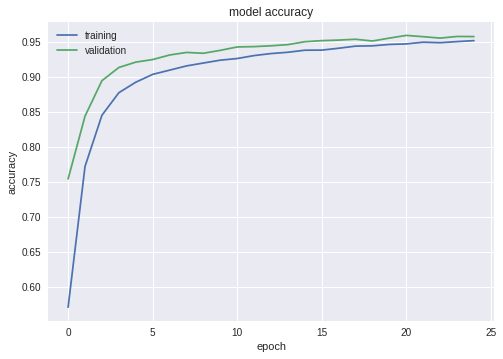

Test loss: 0.19
Test accuracy: 0.947


In [66]:
TestModel(64, 25, [128, 32],'sigmoid')

<class 'float'>
<class 'int'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                25152     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 333,522
Trainable params: 333,522
Non-trainable params: 0
_________________________________________________________________


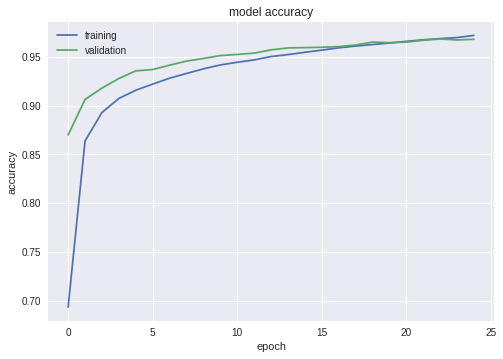

Test loss: 0.139
Test accuracy: 0.959


In [7]:
TestModel(64, 25, [image_vector_size / 2, 64],'sigmoid')

<class 'int'>
<class 'float'>
<class 'int'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                25152     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 948,962
Trainable params: 948,962
Non-trainable params: 0
_________________________________________________________________


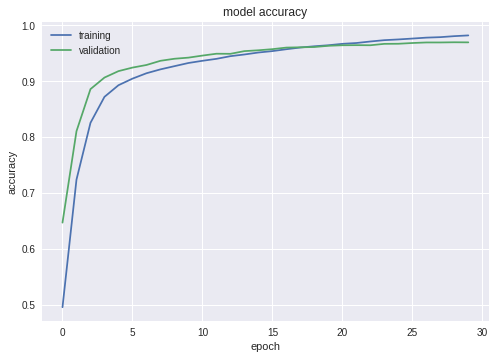

Test loss: 0.136
Test accuracy: 0.959


In [8]:
TestModel(64, 30, [image_vector_size, image_vector_size / 2, 64],'sigmoid')

<class 'int'>
<class 'float'>
<class 'int'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                25152     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 948,962
Trainable params: 948,962
Non-trainable params: 0
_________________________________________________________________


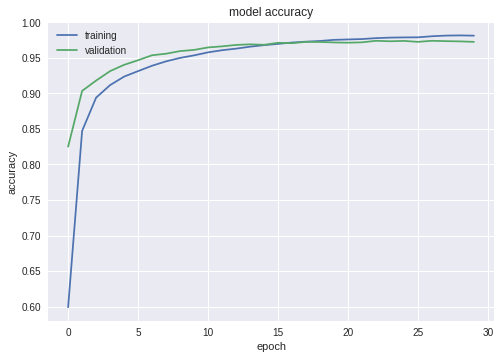

Test loss: 0.104
Test accuracy: 0.968


In [9]:
TestModel(32, 30, [image_vector_size, image_vector_size / 2, 64],'sigmoid')

<class 'int'>
<class 'int'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


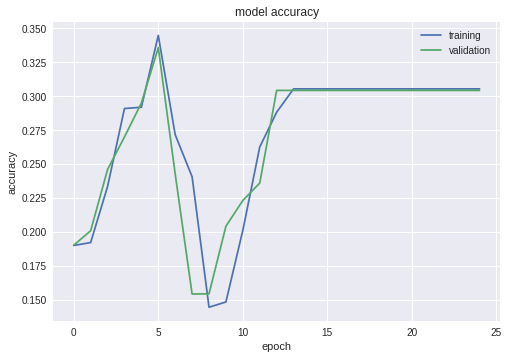

Test loss: 11.2
Test accuracy: 0.303


In [13]:
TestModel(64, 25, [128, 32],'relu')

<class 'int'>
<class 'int'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 105,994
Trainable params: 105,994
Non-trainable params: 0
_________________________________________________________________


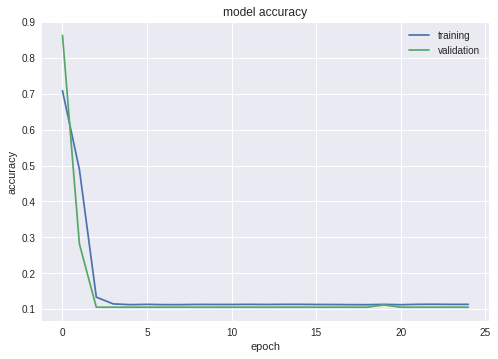

Test loss: 2.3
Test accuracy: 0.114


In [15]:
TestModel(64, 25, [128, 32],'relu')

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 16)                528       
__________________________________________________________

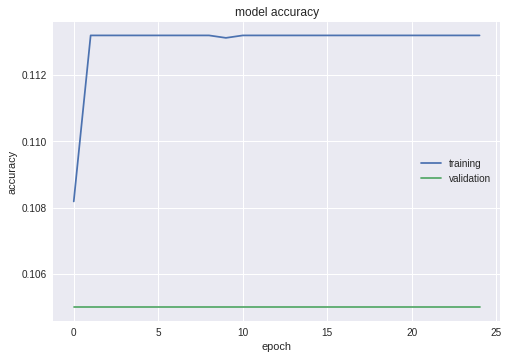

Test loss: 2.3
Test accuracy: 0.114


In [20]:
TestModel(64, 25, [512, 256, 128, 64, 32, 16],'sigmoid')